## **Business Case: Netflix - Data Exploration and Visualisation**
- *M N Wasif  DSML 29 Oct 2025*

---

## **1. Problem Statement & Basic Metrics**

**Problem Statement**:  
Understand Netflix’s content library composition (Movies vs. TV Shows), regional production trends, genre preferences, release patterns, and content duration to inform content acquisition, localization, and scheduling strategies.


**Importing Libraries and Loading the Dataset**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/netflix.csv')
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Replacing nulls with 'missing' string for director, cast, country, and duration
for col in ['director','cast','country','duration']:
  df[col].fillna('missing', inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         0
listed_in        0
description      0
dtype: int64

In [11]:
df.shape

(8807, 12)

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#**1. Data Shape, Types, Missing Values & Summary**

- **Shape**: 8,807 rows × 12 columns  
- **Data Types**:  
  - 1 numeric (`release_year` as `int64`)  
  - 11 object-type (text), later enriched with datetime (`date_added`)
- **Missing Values**:  
  - `director`: 2,634 missing  
  - `cast`: 825 missing  
  - `country`: 831 missing  
  - `date_added`: 10 missing  
  - `rating`: 4 missing  
  → Handled by replacing with `'missing'` or mode


In [15]:
# Analysis of object data types
df.describe(include = 'object')

show_id   type   title director     cast        country  \
count     8807   8807    8807     8807     8807           8807   
unique    8807      2    8807     4529     7693            749   
top      s8807  Movie  Zubaan  missing  missing  United States   
freq         1   6131       1     2634      825           2818   

             date_added rating  duration                     listed_in  \
count              8797   8803      8807                          8807   
unique             1767     17       221                           514   
top     January 1, 2020  TV-MA  1 Season  Dramas, International Movies   
freq                109   3207      1793                           362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [16]:
# Analysis of numeric data types
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [17]:
# Value counts in columns
for col in df.columns:
  print(f'{col} : {df[col].nunique()}')


show_id : 8807
type : 2
title : 8807
director : 4529
cast : 7693
country : 749
date_added : 1767
release_year : 74
rating : 17
duration : 221
listed_in : 514
description : 8775


In [58]:
# Value counts for type, country, release_year, rating, duration

for col in ['type', 'country', 'release_year', 'rating', 'duration']:
  print(f'Value count in {col} column are :-')
  print(df[col].value_counts())
  print('-'*75)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
---------------------------------------------------------------------------
Value count in country column are :-
country
United States                                             2818
India                                                      972
missing                                                    831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64
--------------------------------------------------

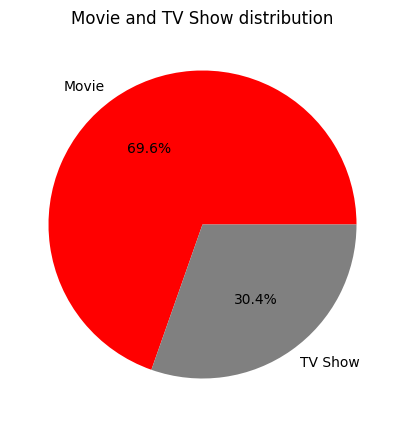

In [71]:
# Movie and TV Show distribution pie plot
plt.figure(figsize = (10, 5))
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct = '%.1f%%', colors=['red','grey'])
plt.title('Movie and TV Show distribution')
plt.show()


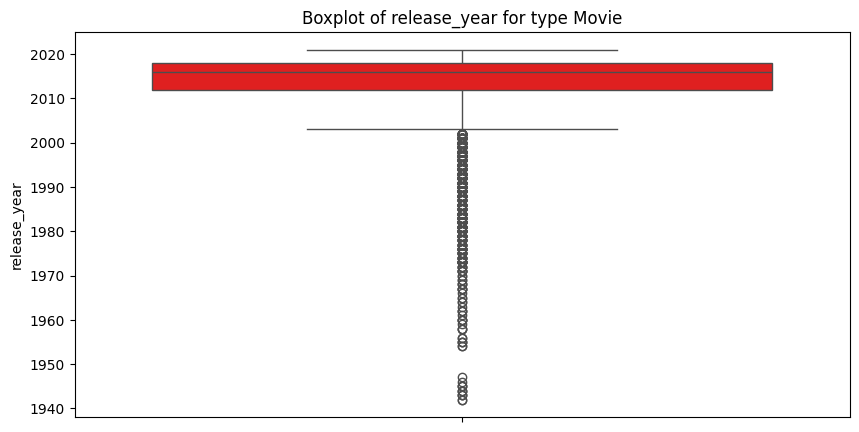

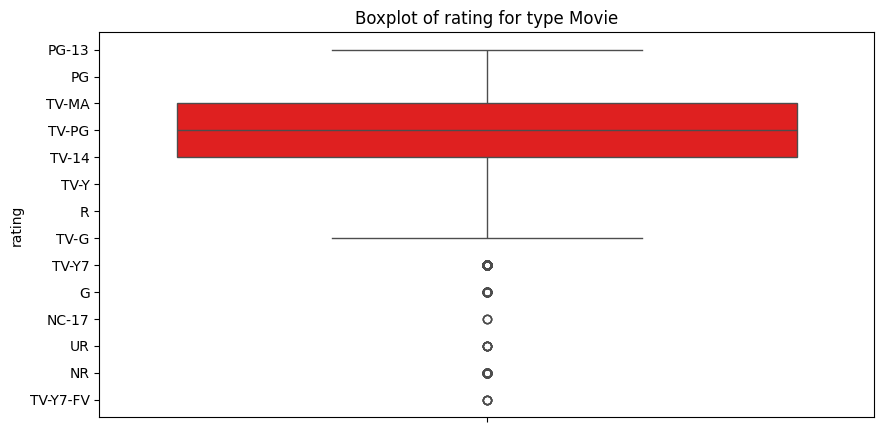

In [79]:
# Boxplots of release_year, rating of type Movie

for col in ['release_year', 'rating']:
  plt.figure(figsize = (10, 5))
  sns.boxplot(df[df['type'] == 'Movie'][col], color='red')
  plt.title(f'Boxplot of {col} for type Movie')
  plt.show()


In [19]:
# Replacing durations in rating by 'UR' (unrated)
df['rating'].fillna('UR', inplace = True)
df['rating'].replace({'66 min': 'UR', '74 min': 'UR','84 min': 'UR'}, inplace = True)
print(f'Value count in rating column are :-')
print(df['rating'].value_counts())

Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
UR            10
TV-Y7-FV       6
NC-17          3
Name: count, dtype: int64


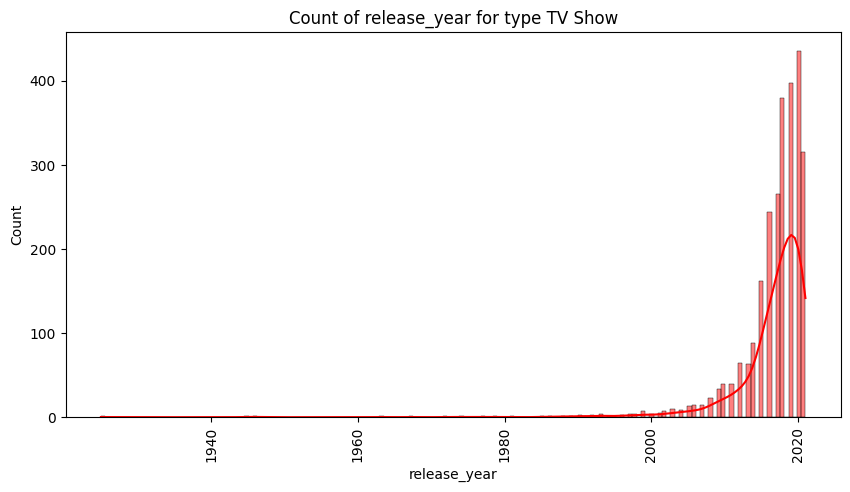

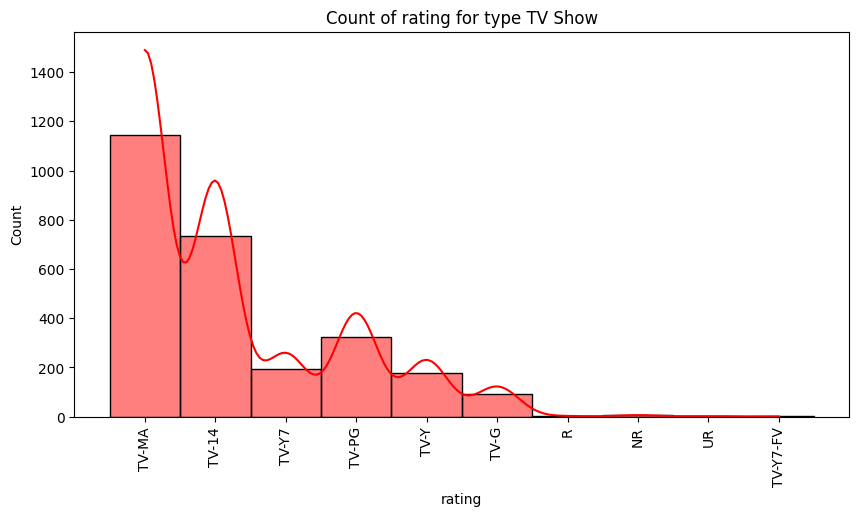

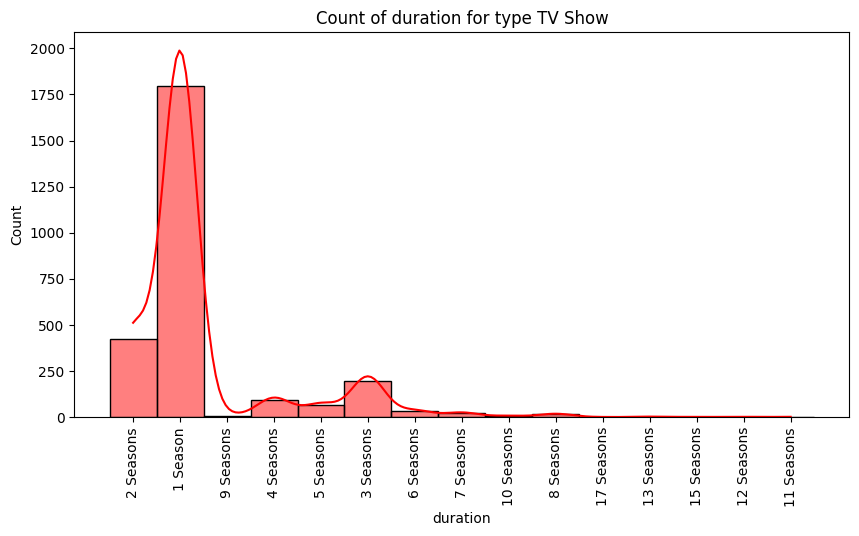

In [277]:
# Histogram analysis
for col in ['release_year', 'rating', 'duration']:
  plt.figure(figsize = (10, 5))
  sns.histplot(df[df['type'] == 'TV Show'][col], color = 'red', kde=True)
  plt.xticks(rotation = 90)
  plt.title(f'Count of {col} for type TV Show')
  plt.show()

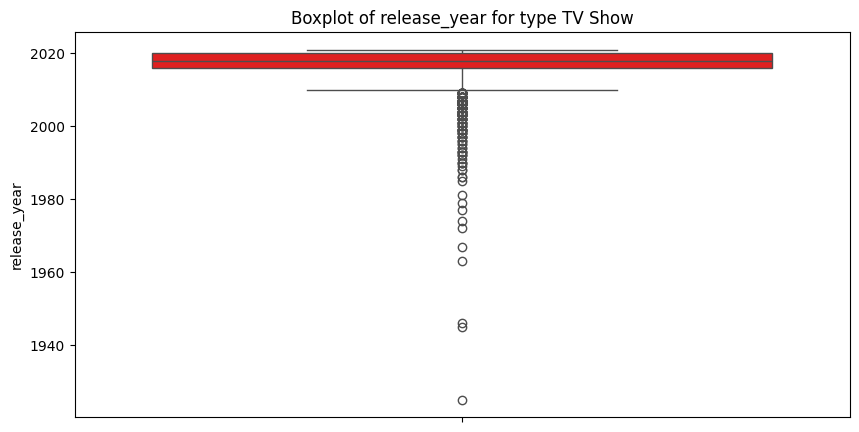

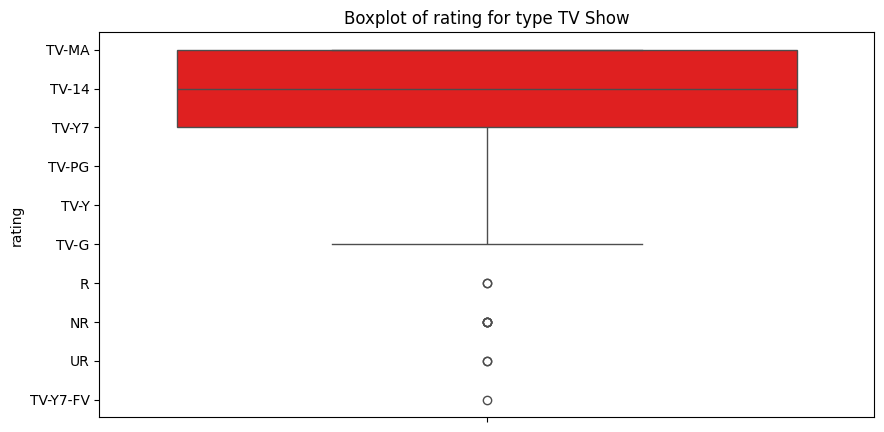

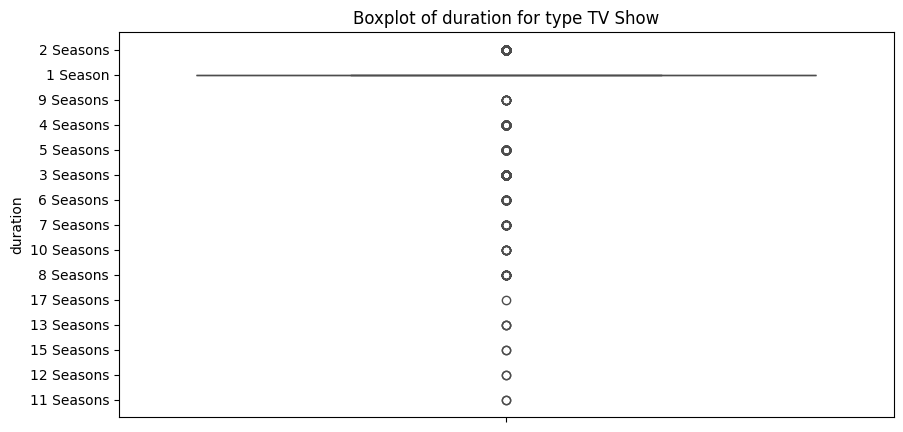

In [75]:
# Boxplots of release_year, rating, duration of type TV Show
for col in ['release_year', 'rating', 'duration']:
  plt.figure(figsize = (10, 5))
  sns.boxplot(df[df['type'] == 'TV Show'][col], color='red')
  plt.title(f'Boxplot of {col} for type TV Show')
  plt.show()

**Basic Metrics**:
- Total entries: **8,807**
- Content split: **6,131 Movies (69.6%)**, **2,676 TV Shows (30.4%)**
- Time range: **1925–2021** (majority from 2013–2021)
- Top country: **United States (2,818 titles)**, followed by **India (972)**
- Most common rating: **TV-MA (3,207)**, indicating mature-audience focus


 **Statistical Summary**:  
  - Median release year: **2017**  
  - Mean release year: **2014.18**  
  - Most frequent duration: **“1 Season” (1,793)** for TV; **“90 min” (152)** for Movies


In [20]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace = True)

In [260]:
import datetime as dt
df["date_added"] = pd.to_datetime(df['date_added'],format='mixed')

df['weekday_added']=df['date_added'].dt.day_name()
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8807 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  weekday_added     8807 non-null   object        
 13  month_name_added  8807 non-null   object        
 14  year_added        8807 n

In [22]:
# List cases where year_added is less than release_year
df[df['year_added'] < df['release_year']].value_counts().sum()

np.int64(14)

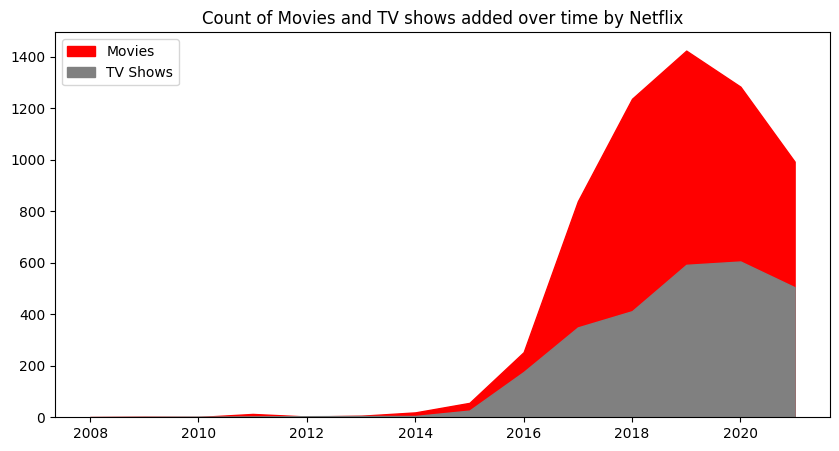

In [117]:
# Count of of Movies and TV Show added over time by year_added
movies_sum = df[df['type'] == 'Movie'].groupby('year_added')['title'].count()
tvshow_sum = df[df['type'] == 'TV Show'].groupby('year_added')['title'].count()

plt.figure(figsize = (10, 5))
plt.stackplot(movies_sum.index, movies_sum.values, color = 'red')
plt.stackplot(tvshow_sum.index, tvshow_sum.values, color = 'grey')
plt.legend(['Movies', 'TV Shows'])
plt.title('Count of Movies and TV shows added over time by Netflix')
plt.show()

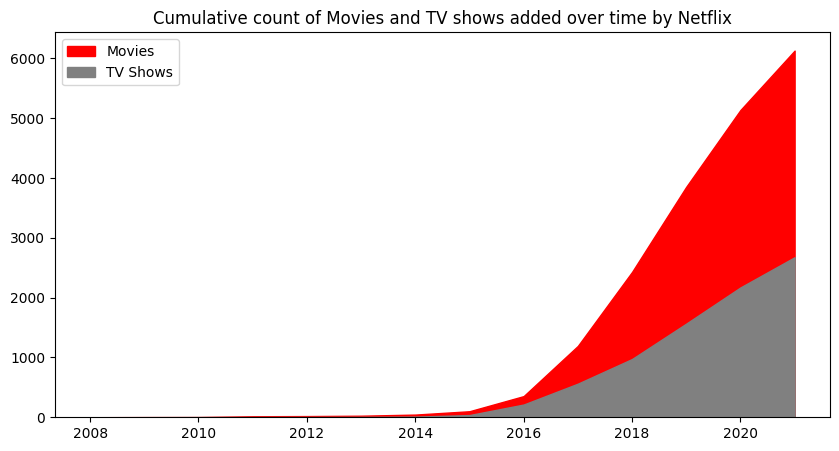

In [116]:
# Cumulative count of Movies and TV Show added over time by year_added
movie_cumsum = df[df['type'] == 'Movie'].groupby('year_added')['title'].count().cumsum()
tvshow_cumsum = df[df['type'] == 'TV Show'].groupby('year_added')['title'].count().cumsum()

plt.figure(figsize = (10, 5))
plt.stackplot(movie_cumsum.index, movie_cumsum.values, color = 'red')
plt.stackplot(tvshow_cumsum.index, tvshow_cumsum.values, color = 'grey')
plt.legend(['Movies', 'TV Shows'])
plt.title('Cumulative count of Movies and TV shows added over time by Netflix')
plt.show()



In [274]:
# Calculate difference between the columns having year_added  and release_year and get the mean difference
df['year_diff'] = df['year_added'] - df['release_year']
print('Mean difference between year added annd year of release:',df['year_diff'].mean())
print('Median difference between year added annd year of release:',df['year_diff'].median())
print('Mode difference between year added annd year of release:',df['year_diff'].mode())

Mean difference between year added annd year of release: 4.692971499943227
Median difference between year added annd year of release: 1.0
Mode difference between year added annd year of release: 0    0
Name: year_diff, dtype: int64


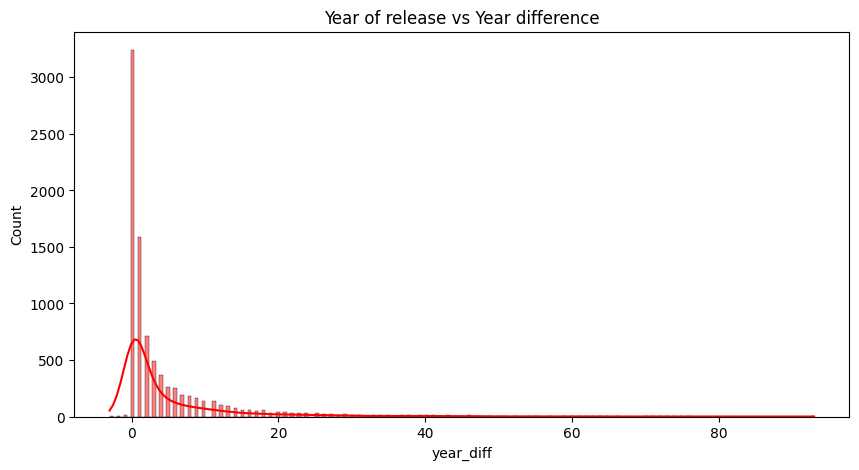

In [273]:
# Plot the year_diff against count of titles
plt.figure(figsize = (10, 5))
sns.histplot(df['year_diff'], color = 'red', kde=True)
plt.title('Year of release vs Year difference')
plt.show()

In [23]:
# Un-nesting directors, cast, and country columns into multiple rows in new_df
import copy
df_new = copy.deepcopy(df)


In [258]:
df_new['director'] = df_new['director'].str.split(', ')
df_new = df_new.explode('director')

df_new['cast'] = df_new['cast'].str.split(', ')
df_new = df_new.explode('cast')

df_new['country'] = df_new['country'].str.split(', ')
df_new = df_new.explode('country')

df_new.shape

(89382, 15)

In [63]:
# Count of countries by unique titles in descending order
df_new.groupby('country')['title'].nunique().sort_values(ascending = False).head(20)

country
United States     3689
India             1046
missing            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: title, dtype: int64

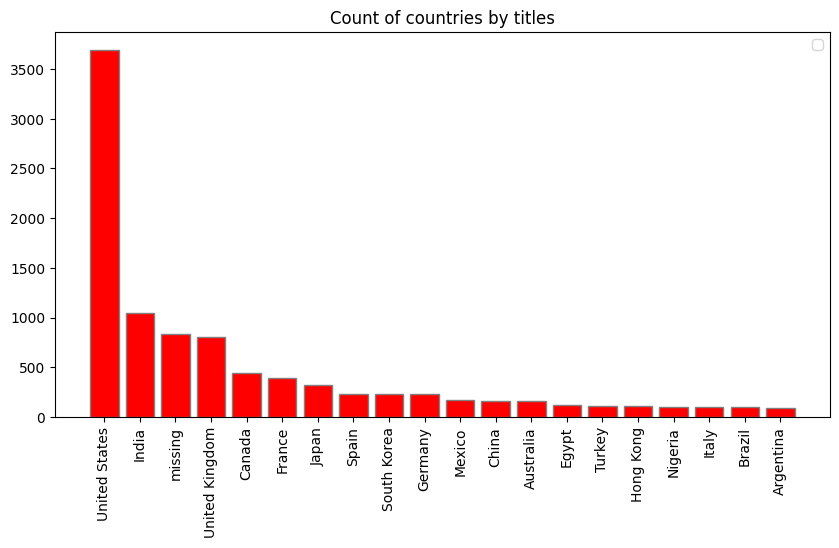

In [107]:
# Bar plot of countries by unique titles in descending order
title_country = df_new.groupby('country')['title'].nunique().sort_values(ascending = False).head(20)

plt.figure(figsize = (10, 5))
plt.bar(title_country.index, title_country, color = 'red', edgecolor = 'grey')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Count of countries by titles')
plt.show()

In [114]:
# Count of unique directors by titles in descending order
df_new.groupby('director')['title'].nunique().sort_values(ascending = False)[1:11]


director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: title, dtype: int64

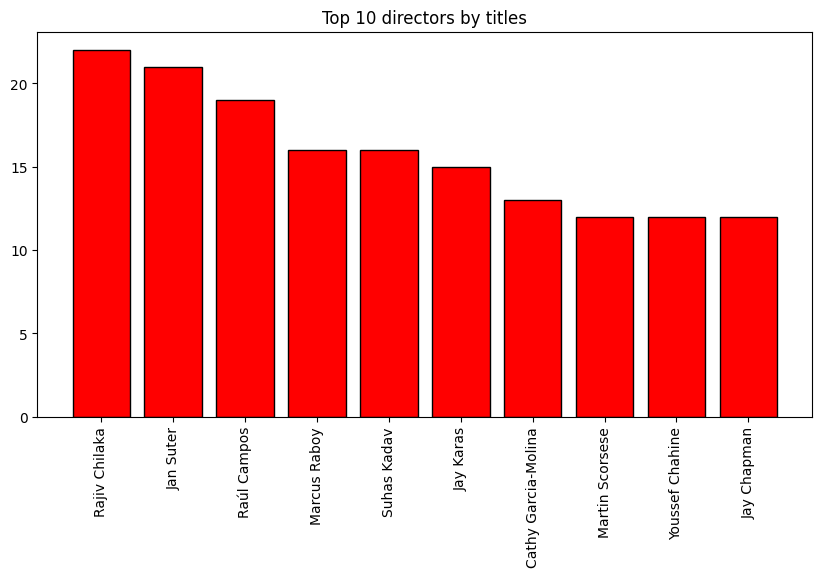

In [279]:
# Barplot of directors by titles in descending order
title_director = df_new.groupby('director')['title'].nunique().sort_values(ascending = False)[1:11]
plt.figure(figsize = (10, 5))
plt.bar(title_director.index, title_director.values,  color ='red', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.title('Top 10 directors by titles')
plt.show()

In [280]:
# Count of directors by title in descending order of type Movies
df_new[df_new['type'] == 'Movie'].groupby('director')['title'].nunique().sort_values(ascending = False)[1:11]

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: title, dtype: int64

In [281]:
# Count of directors by title in descending order of type TV Show
df_new[df_new['type'] == 'TV Show'].groupby('director')['title'].nunique().sort_values(ascending = False)[1:11]

director
Ken Burns                3
Alastair Fothergill      3
Joe Berlinger            2
Hsu Fu-chun              2
Lynn Novick              2
Rob Seidenglanz          2
Iginio Straffi           2
Shin Won-ho              2
Gautham Vasudev Menon    2
Stan Lathan              2
Name: title, dtype: int64

In [282]:
# Count of unique cast members by titles in descending order
df_new.groupby('cast')['title'].nunique().sort_values(ascending = False)[1:11]

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: title, dtype: int64

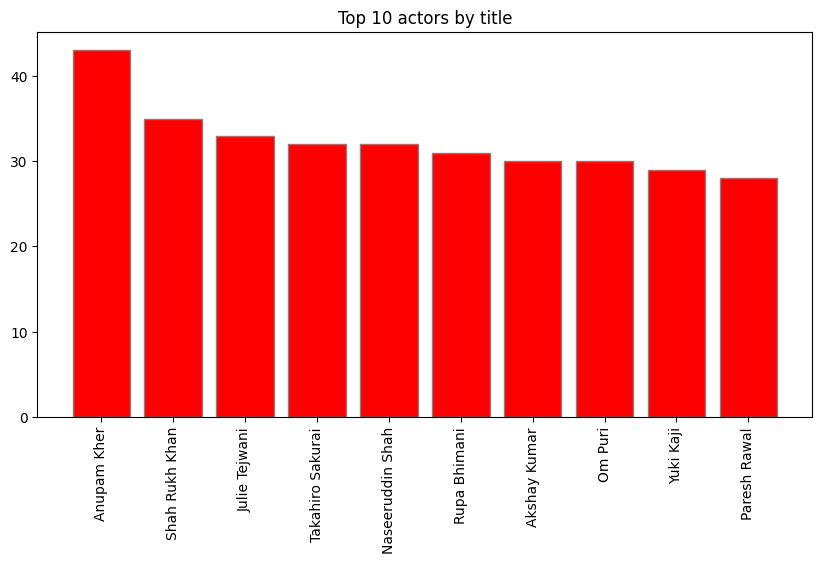

In [285]:
# Barplot of actors by titles in descending order
title_cast = df_new.groupby('cast')['title'].nunique().sort_values(ascending = False)[1:11]
plt.figure(figsize = (10, 5))
plt.bar(title_cast.index, title_cast.values, color = 'red', edgecolor = 'grey')
plt.xticks(rotation = 90)
plt.title('Top 10 actors by title')
plt.show()

In [283]:
# Count of unique cast members by titles in descending order of type Movies
df_new[df_new['type'] == 'Movie'].groupby('cast')['title'].nunique().sort_values(ascending = False)[1:11]

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Paresh Rawal        28
Julie Tejwani       28
Amitabh Bachchan    28
Rupa Bhimani        27
Boman Irani         27
Name: title, dtype: int64

In [284]:
# Count of unique cast members by titles in descending order of type TV Show
df_new[df_new['type'] == 'TV Show'].groupby('cast')['title'].nunique().sort_values(ascending = False)[1:11]

cast
Takahiro Sakurai      25
Yuki Kaji             19
Daisuke Ono           17
Ai Kayano             17
Junichi Suwabe        17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Hiroshi Kamiya        13
Name: title, dtype: int64

In [31]:
# Top countries overall
df_new.groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     3689
India             1046
missing            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: title, dtype: int64

In [32]:
# Countries by type == Movie
df_new[df_new['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     2751
India              962
United Kingdom     532
missing            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: title, dtype: int64

In [33]:
# Countries by type == TV Show
df_new[df_new['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     938
missing           391
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Name: title, dtype: int64

In [36]:
# Year of movie release by value_count
df[df['type'] == 'Movie'].groupby('release_year')['title'].count().sort_values(ascending = False).head(10)

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
Name: title, dtype: int64

In [37]:
# Year of TV show release by count
df[df['type'] == 'TV Show'].groupby('release_year')['title'].count().sort_values(ascending = False).head(20)

release_year
2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2011     40
2010     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
Name: title, dtype: int64

In [38]:
# Month of movie release by count
df[df['type'] == 'Movie'].groupby('month_name_added')['title'].count().sort_values(ascending = False)

month_name_added
July         565
April        550
December     547
January      546
October      545
March        529
September    519
August       519
November     498
June         492
May          439
February     382
Name: title, dtype: int64

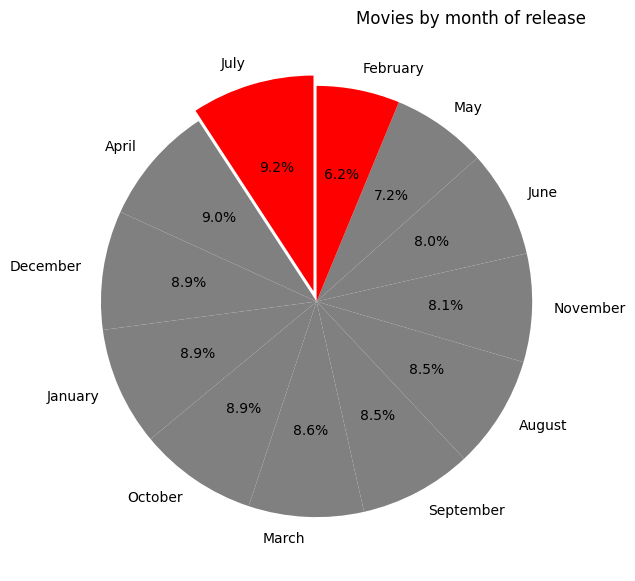

In [166]:
# Pie chart of Movie count  by month of release
movie_month = df[df['type'] == 'Movie'].groupby('month_name_added')['title'].count().sort_values(ascending = False)
e = len(movie_month.index) * [0]
e[0] =0.05


plt.figure(figsize = (7, 7))
plt.pie(movie_month.values,
        labels = movie_month.index,
        startangle=90,
        explode= e,
        autopct = '%.1f%%',
        colors = ['red', 'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey'])
plt.title('Movies by month of release', loc='right')
plt.show()

In [167]:
# Month of TV show release by count
df[df['type'] == 'TV Show'].groupby('month_name_added')['title'].count().sort_values(ascending=False)

month_name_added
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
January      202
May          193
February     181
Name: title, dtype: int64

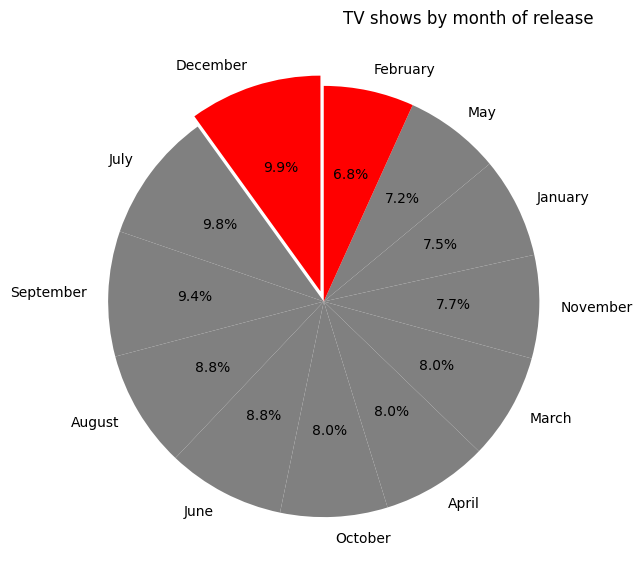

In [168]:
# Pie chart of TV Show count  by month of release
tvshow_month = df[df['type'] == 'TV Show'].groupby('month_name_added')['title'].count().sort_values(ascending = False)
e = len(tvshow_month.index) * [0]
e[0] =0.05


plt.figure(figsize = (7, 7))
plt.pie(tvshow_month.values,
        labels = tvshow_month.index,
        startangle=90,
        explode= e,
        autopct = '%.1f%%',
        colors = ['red', 'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey'])
plt.title('TV shows by month of release', loc='right')
plt.show()

In [40]:
# Weekday of Movie release by count
df[df['type'] == 'Movie'].groupby('weekday_added')['title'].count().sort_values(ascending = False)


weekday_added
Friday       1566
Thursday     1053
Wednesday     906
Tuesday       852
Monday        628
Sunday        569
Saturday      557
Name: title, dtype: int64

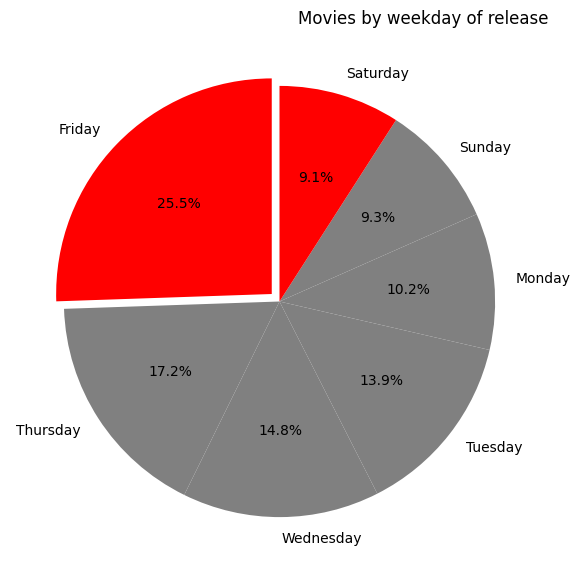

In [170]:
# Pie chart of Movies release by weekday
movie_weekday = df[df['type'] == 'Movie'].groupby('weekday_added')['title'].count().sort_values(ascending=False)
e = len(movie_weekday.index) * [0]
e[0] =0.05

plt.figure(figsize = (7, 7))
plt.pie(movie_weekday.values,
        labels = movie_weekday.index,
        startangle=90,
        explode= e,
        autopct = '%.1f%%',
        colors = ['red', 'grey','grey','grey','grey','grey'])
plt.title('Movies by weekday of release', loc='right')
plt.show()

In [41]:
# Weekday of TV Show release by count
df[df['type'] == 'TV Show'].groupby('weekday_added')['title'].count().sort_values(ascending = False)

weekday_added
Friday       932
Wednesday    392
Tuesday      345
Thursday     343
Saturday     259
Monday       223
Sunday       182
Name: title, dtype: int64

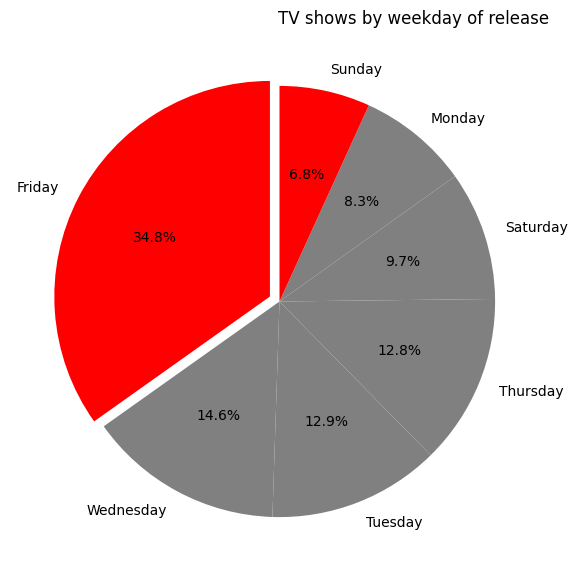

In [171]:
# Pie chart of TV show release by weekday
tvshow_weekday = df[df['type'] == 'TV Show'].groupby('weekday_added')['title'].count().sort_values(ascending=False)
e = len(tvshow_weekday.index) * [0]
e[0] =0.05

plt.figure(figsize = (7, 7))
plt.pie(tvshow_weekday.values,
        labels = tvshow_weekday.index,
        startangle=90,
        explode= e,
        autopct = '%.1f%%',
        colors = ['red', 'grey','grey','grey','grey','grey'])
plt.title('TV shows by weekday of release', loc='right')
plt.show()

In [80]:
# Un-nesting 'listed_in' columns into multiple rows in df2
df2 = copy.deepcopy(df)

df2['listed_in'] = df2['listed_in'].str.split(', ')
df2 = df2.explode('listed_in')
df2.shape

(19323, 15)

In [43]:
# Count of categories in listed_in by title
df2.groupby('listed_in')['title'].count().sort_values(ascending = False)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
Classic Movies                   116
LGBTQ Movies                     102
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Anime Features                    71
Cult Movies                       71
Teen TV Shows                     69
Faith & Spirituality              65
Movies                            57
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: title, dtype: int64

In [44]:
# Count of categories in listed_in by title in Movies category
df2[df2['type'] == 'Movie'].groupby('listed_in')['title'].count().sort_values(ascending = False)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: title, dtype: int64

In [45]:
# Count of categories in listed_in by title in TV Show category
df2[df2['type'] == 'TV Show'].groupby('listed_in')['title'].count().sort_values(ascending=False)

listed_in
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: title, dtype: int64

## **3. Non-Graphical Analysis: Value Counts & Uniques**

- **Unique values**:  
  - `title`: 8,807 (all unique)  
  - `director`: 4,529  
  - `cast`: 7,693  
  - `country`: 749  
  - `listed_in` (genres): 514  
- **Top categories**:  
  - **Genres**: *International Movies (2,752)*, *Dramas (2,427)*, *Comedies (1,674)*  
  - **Countries**: US (2,818), India (972), UK (419)  
  - **Directors**: Rajiv Chilaka (22), Jan Suter (21)  
  - **Actors**: Anupam Kher (43), Shah Rukh Khan (35), Julie Tejwani (33)

> Note: Multi-value fields (`director`, `cast`, `country`, `listed_in`) were **unnested** into separate rows (e.g., one title with 3 actors → 3 rows), enabling granular analysis.


In [215]:
# Correlation of listed_in vs titles by TV and Movie Shows

listed_in_corr= df2.pivot_table(index = 'rating', columns = 'listed_in', values = 'title', aggfunc = 'count')

listed_in_corr.replace(np.nan, 0, inplace = True)
listed_in_corr

listed_in_corr.corr()

listed_in                     Action & Adventure  Anime Features  \
listed_in                                                          
Action & Adventure                      1.000000        0.532899   
Anime Features                          0.532899        1.000000   
Anime Series                            0.604060        0.843710   
British TV Shows                        0.481826        0.763373   
Children & Family Movies               -0.340181        0.059797   
Classic & Cult TV                       0.581371        0.936651   
Classic Movies                          0.808045        0.429225   
Comedies                                0.867619        0.829789   
Crime TV Shows                          0.582408        0.559888   
Cult Movies                             0.724484       -0.013790   
Documentaries                           0.646459        0.871840   
Docuseries                              0.534439        0.827416   
Dramas                                  0.891200        0.747877   
Faith & Spirituality                    0.362292        0.820333   
Horror Movies                           0.849606        0.378730   
Independent Movies                      0.824690        0.474407   
International Movies                    0.713619        0.834113   
International TV Shows                  0.647753        0.769966   
Kids' TV                               -0.343201       -0.105396   
Korean TV Shows                         0.615047        0.847331   
LGBTQ Movies                            0.642125        0.497020   
Movies                                  0.032634        0.260634   
Music & Musicals                        0.738729        0.884641   
Reality TV                              0.522811        0.929918   
Romantic Movies                         0.846223        0.859807   
Romantic TV Shows                       0.659039        0.871543   
Sci-Fi & Fantasy                        0.806152        0.270642   
Science & Nature TV                     0.219160        0.825697   
Spanish-Language TV Shows               0.527780        0.533660   
Sports Movies                           0.768427        0.750115   
Stand-Up Comedy                         0.504804        0.433143   
Stand-Up Comedy & Talk Shows            0.544988        0.585150   
TV Action & Adventure                   0.591442        0.718657   
TV Comedies                             0.561028        0.724527   
TV Dramas                               0.650922        0.727705   
TV Horror                               0.577481        0.553949   
TV Mysteries                            0.627880        0.633017   
TV Sci-Fi & Fantasy                     0.590748        0.863594   
TV Shows                                0.688780        0.724958   
TV Thrillers                            0.569149        0.554475   
Teen TV Shows                           0.602859        0.941885   
Thrillers                               0.904140        0.480009   

listed_in                     Anime Series  British TV Shows  \
listed_in                                                      
Action & Adventure                0.604060          0.481826   
Anime Features                    0.843710          0.763373   
Anime Series                      1.000000          0.778865   
British TV Shows                  0.778865          1.000000   
Children & Family Movies         -0.089386         -0.086945   
Classic & Cult TV                 0.932618          0.890640   
Classic Movies                    0.328953          0.189768   
Comedies                          0.866456          0.744238   
Crime TV Shows                    0.773365          0.882792   
Cult Movies                      -0.021801         -0.074901   
Documentaries                     0.865310          0.948533   
Docuseries                        0.811987          0.982144   
Dramas                            0.845145          0.795281   
Faith & Spirituality              0.438478     

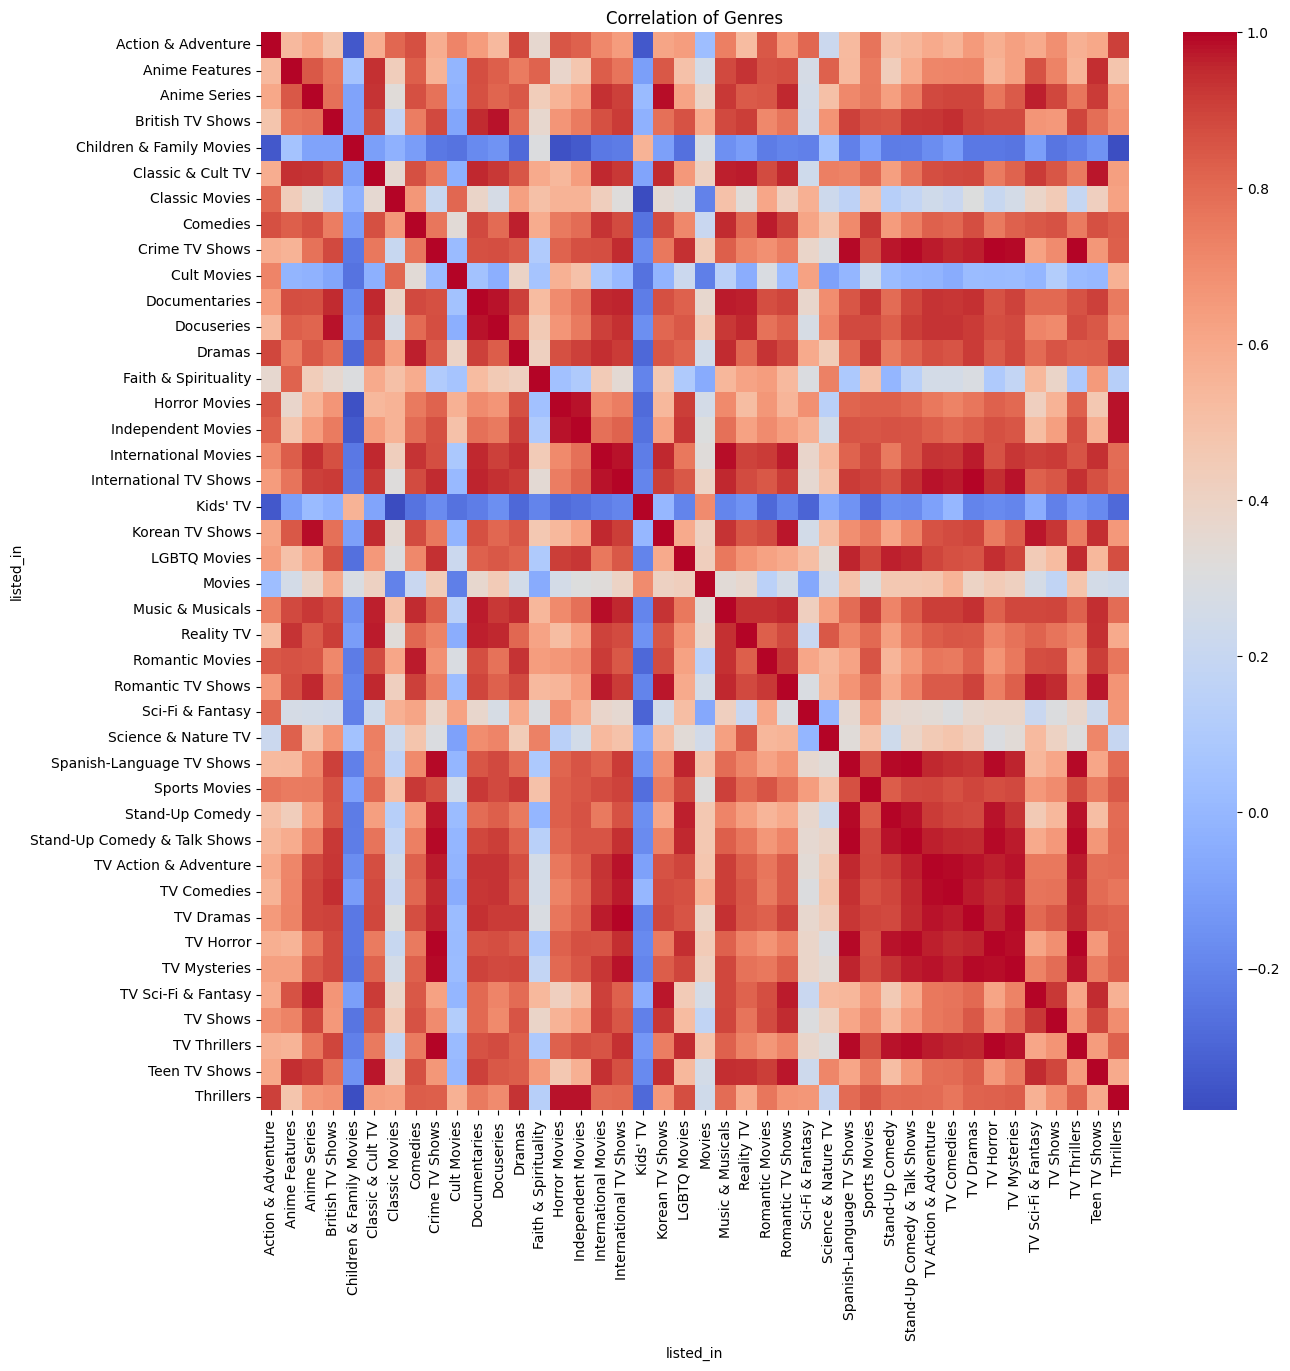

In [226]:
plt.figure(figsize = (14, 14))
sns.heatmap(listed_in_corr.corr(), annot = False, cmap='coolwarm')
plt.title('Correlation of Genres')
plt.show()

In [46]:
# Duration of Movies
df[df['type'] == 'Movie'].groupby('duration')['title'].count().sort_values(ascending = False)

duration
90 min     152
97 min     146
93 min     146
94 min     146
91 min     144
          ... 
253 min      1
43 min       1
5 min        1
8 min        1
9 min        1
Name: title, Length: 206, dtype: int64

In [47]:
# Duration of TV Shows
df[df['type'] == 'TV Show'].groupby('duration')['title'].count().sort_values(ascending = False)
#

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
15 Seasons       2
11 Seasons       2
17 Seasons       1
Name: title, dtype: int64

In [229]:
# Mean duration of movies by country in df_new
df_movies = df_new[(df_new['type'] == 'Movie') & (df_new['duration'] != 'missing')].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(int)
df_movies.groupby('country')['duration_minutes'].mean().sort_values(ascending = False)

country
Liechtenstein      200.000000
Montenegro         157.000000
Soviet Union       156.636364
Morocco            145.413043
Bahamas            145.000000
                      ...    
Guatemala           68.333333
Uganda              68.000000
Kazakhstan          67.000000
Namibia             49.250000
United Kingdom,     31.600000
Name: duration_minutes, Length: 123, dtype: float64

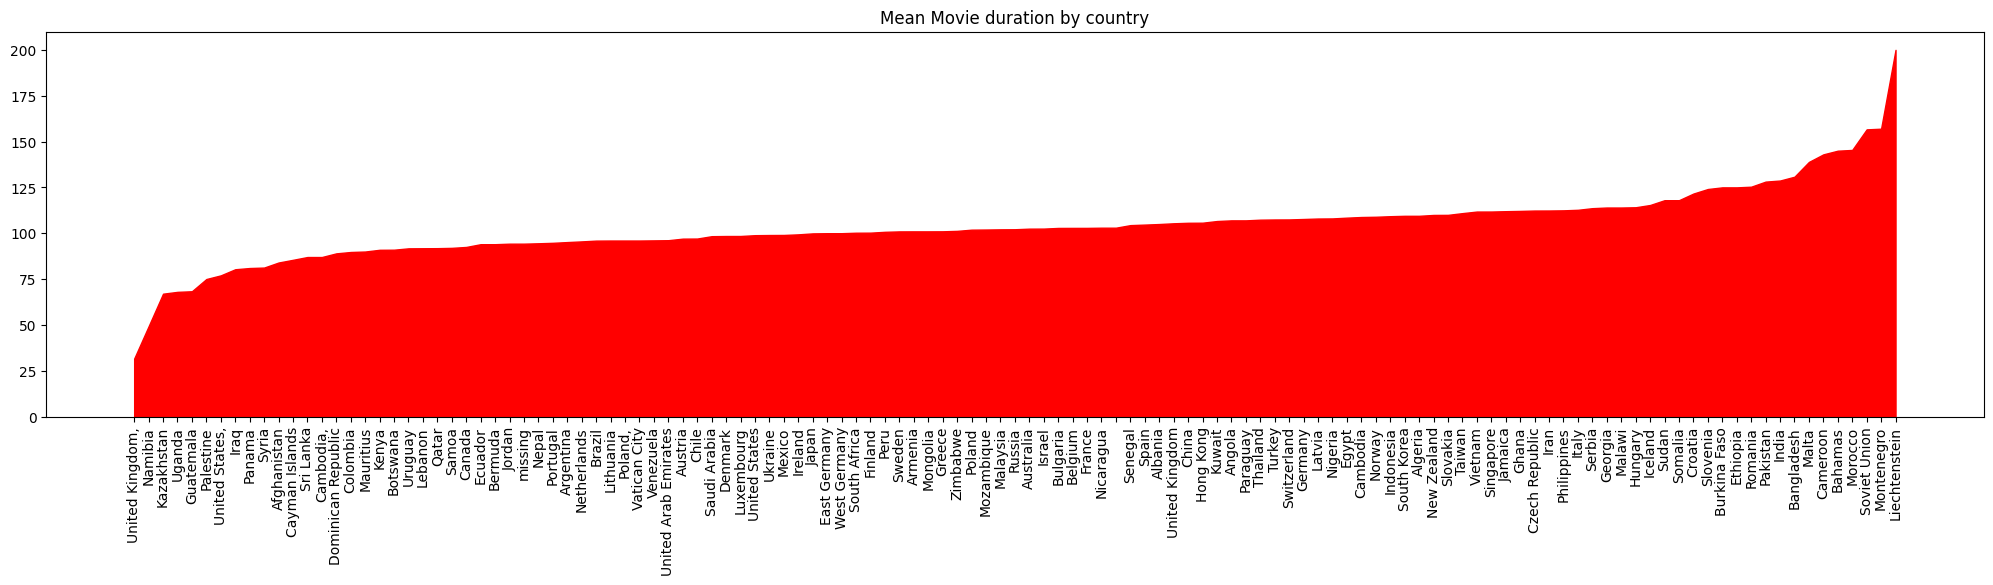

In [246]:
# Stackplot of mean Movie duration by country
mean_duration = df_movies.groupby('country')['duration_minutes'].mean().sort_values()
plt.figure(figsize = (25, 5))
plt.stackplot(mean_duration.index, mean_duration.values, color = 'red', baseline='zero')
plt.xticks(rotation = 90)
plt.title('Mean Movie duration by country')
plt.show()

In [295]:
# Mean duration of movies
df_movies['duration_minutes'].mean()

np.float64(104.50364997015748)

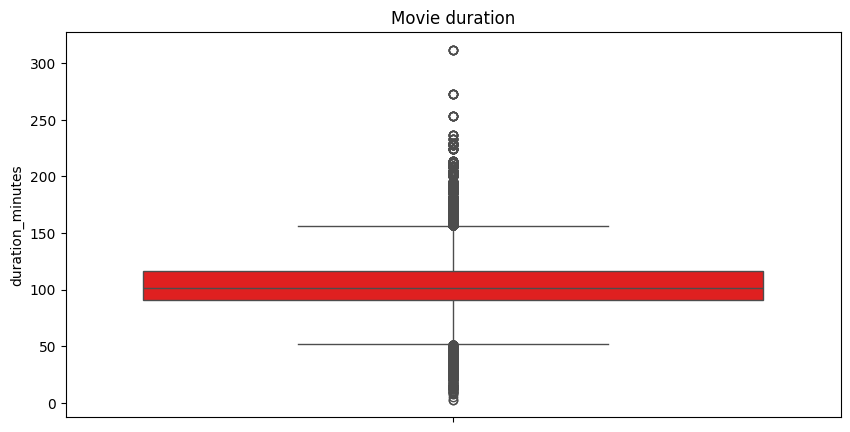

In [78]:
# Boxplot of duration of Movie
plt.figure(figsize = (10, 5))
sns.boxplot(df_movies[df_movies['type'] == 'Movie']['duration_minutes'], color='red')
plt.title('Movie duration')
plt.show()

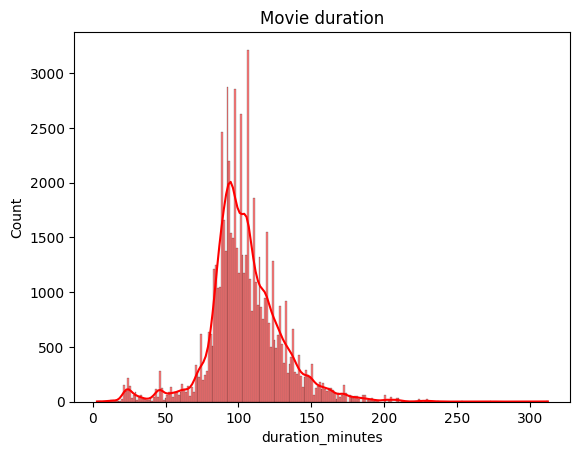

In [256]:
# Histplot of duration of Movie
sns.histplot(df_movies[df_movies['type'] == 'Movie']['duration_minutes'], color='red', kde=True)
plt.title('Movie duration')
plt.show()

In [175]:
# Mean duration of TV Show by country
df_tv = df_new[(df_new['type'] == 'TV Show') & (df_new['duration'] != 'missing')].copy()
df_tv['duration_seasons'] = df_tv['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)
df_tv.groupby('country')['duration_seasons'].mean().sort_values(ascending = False)

country
Malta                   4.000000
Canada                  3.087638
United Arab Emirates    3.000000
Hungary                 3.000000
United States           2.708505
                          ...   
Puerto Rico             1.000000
Mauritius               1.000000
Syria                   1.000000
Switzerland             1.000000
West Germany            1.000000
Name: duration_seasons, Length: 67, dtype: float64

In [296]:
# Mean duration of TV shows
df_tv['duration_seasons'].mean()

np.float64(1.9726660009985022)

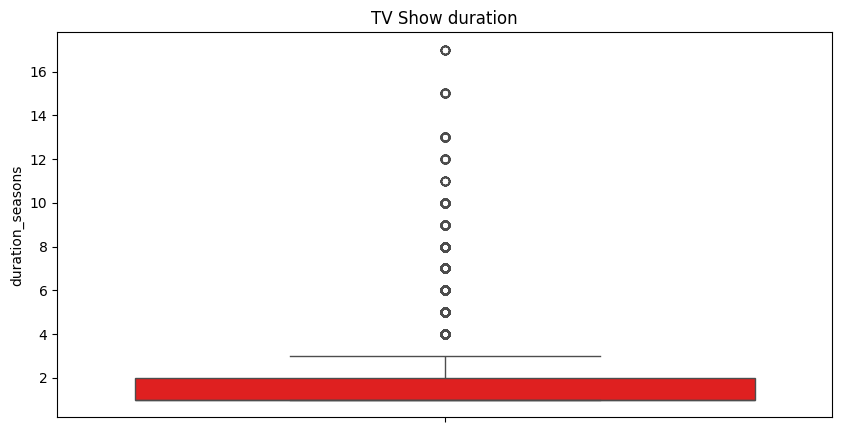

In [298]:
# Boxplot of duration of TV Show
plt.figure(figsize = (10, 5))
sns.boxplot(df_tv['duration_seasons'], color='red')
plt.title('TV Show duration')
plt.show()

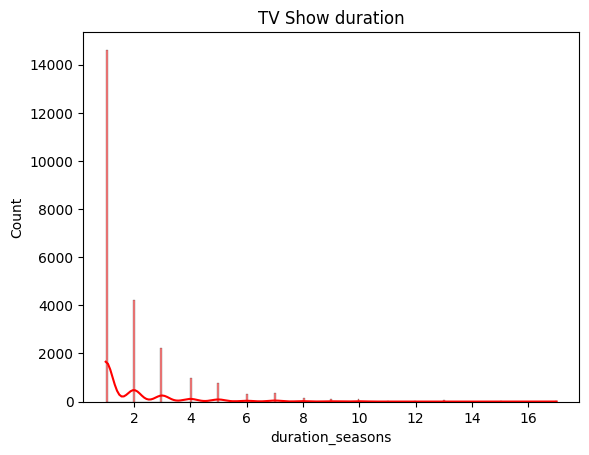

In [300]:
# Histplot of duration of TV Shows
sns.histplot(df_tv['duration_seasons'], color='red', kde=True)
plt.title('TV Show duration')
plt.show()

## **4. Visual Analysis**

### **4.1 Continuous Variables – Univariate**
- **`release_year`**:  
  - Histogram shows sharp rise from 2015–2020, peaking in **2018**  
  - Boxplot confirms concentration in 2013–2019 (IQR), with older outliers (1925–1960s)
- **`duration` (converted to numeric)**:  
  - Movie durations: **Right-skewed**, peak at **90–100 min**, median ~99 min  
  - TV Show seasons: **Highly right-skewed**, 75% are **1–2 seasons**, long tail up to 17 seasons

### **4.2 Categorical Variables – Bivariate**
- **Boxplots by `type`**:  
  - Confirmed **Movies dominate recent releases** (2016–2020)  
  - **TV Shows grew steadily post-2017**, with 2020 as peak year (436)
- **Genre vs. Type**:  
  - *International Movies*, *Dramas*, *Comedies* → Movie-heavy  
  - *International TV Shows*, *TV Dramas*, *Crime TV* → TV-heavy
- **Country vs. Type**:  
  - **India**: Strong in Movies (962) vs. TV (84)  
  - **Japan/South Korea**: Balanced or TV-leaning  
  - **US**: Dominates both categories


## **5. Missing Values & Outliers**

- **Missing Values**:  
  - Strategically imputed: `'missing'` for categorical, **mode** for `date_added`  
  - No deletion → preserved sample size
- **Outliers**:  
  - **Temporal**: Titles released before 1980 (e.g., 1925) — valid but rare  
  - **Duration**: Movies >180 min (e.g., *Zodiac*: 158 min) and TV shows >10 seasons — real outliers but meaningful (e.g., legacy series)
  - **No aggressive trimming** — retained for completeness


In [50]:
import wordcloud as wc

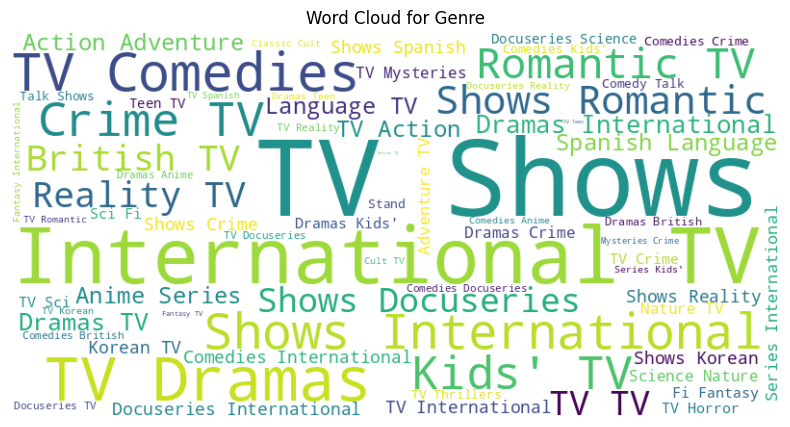

In [248]:
# Wordclould of listed_by in df2
dftv = df2[df2['type'] == 'TV Show']
wordcloud = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(dftv['listed_in']))
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genre in TV Shows')
plt.show()

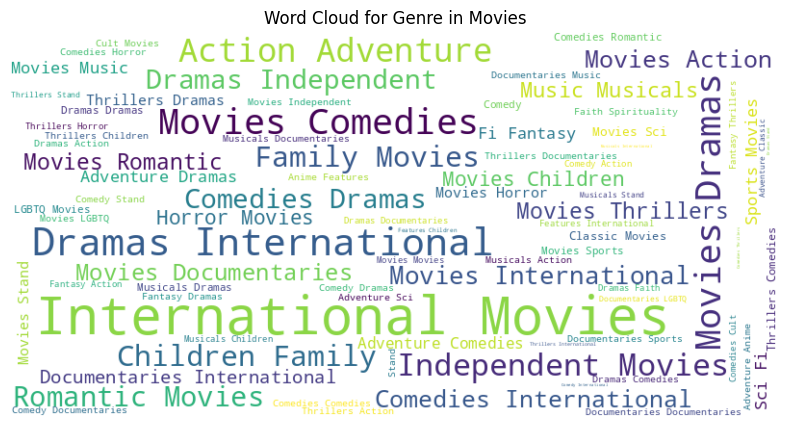

In [249]:
# Wordclould of listed_by in df2
dfmovie = df2[df2['type'] == 'Movie']
wordcloud = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(dfmovie['listed_in']))
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genre in Movies')
plt.show()

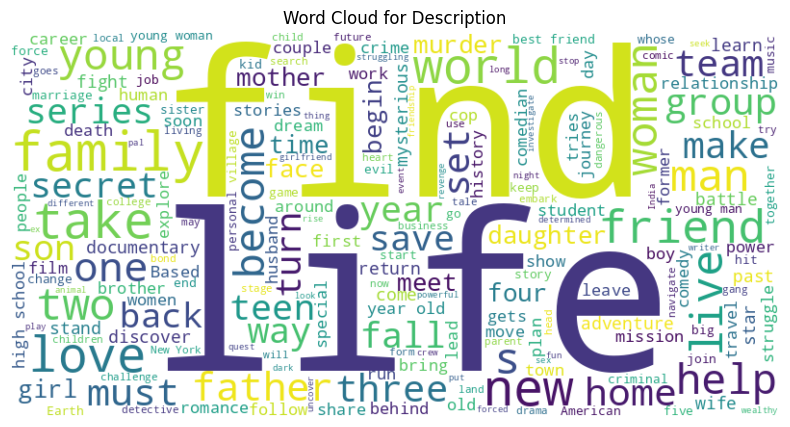

In [51]:
# Wordcloud of description column of df
wordcloud = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(df['description']))
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Description')
plt.show()

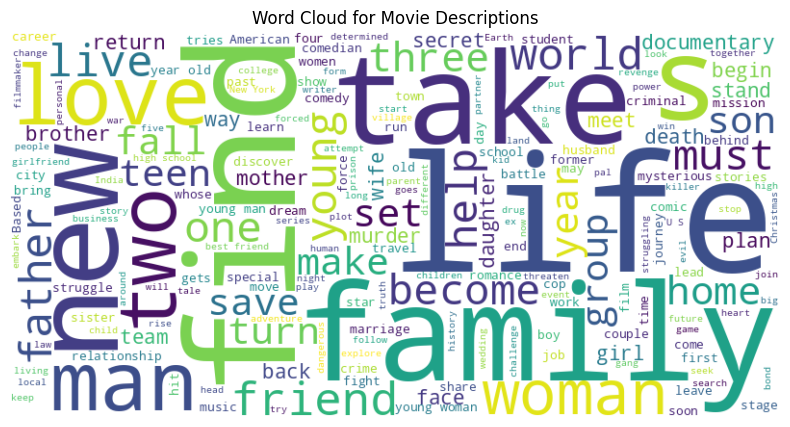

In [52]:
# Wordcloud for movie descriptions
movie_descriptions = ' '.join(df[df['type'] == 'Movie']['description'])
wordcloud_movies = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(movie_descriptions)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions')
plt.show()

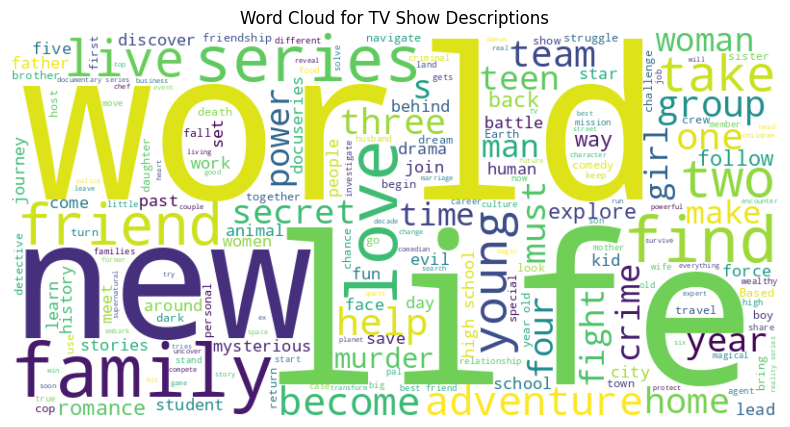

In [53]:
# Wordcloud for TV show descriptions
tvshow_descriptions = ' '.join(df[df['type'] == 'TV Show']['description'])
wordcloud_tvshows = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(tvshow_descriptions)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_tvshows, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TV Show Descriptions')
plt.show()

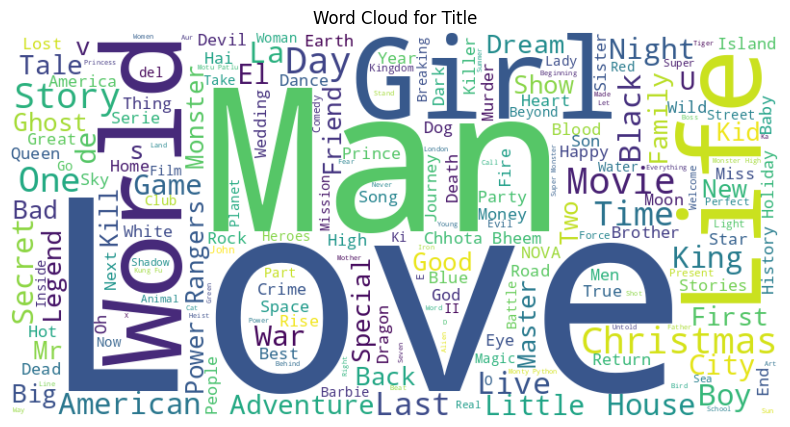

In [54]:
# Wordcloud for title
title_descriptions = ' '.join(df['title'])
wordcloud_title = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(title_descriptions)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.show()

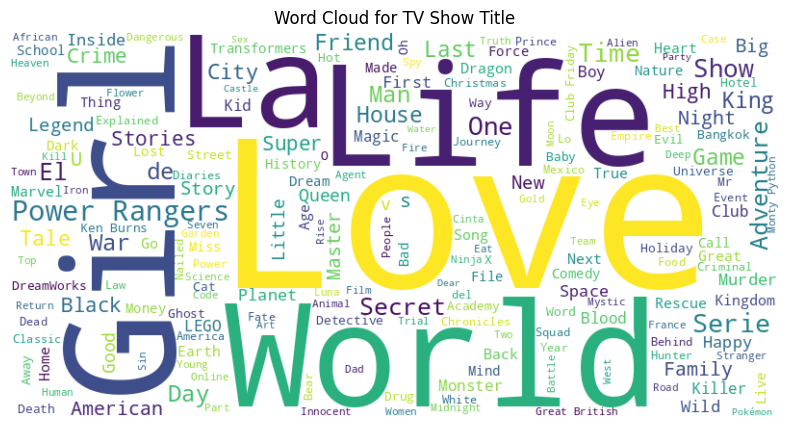

In [55]:
# Wordcloud for title for TV Show
tvshow_title = ' '.join(df[df['type'] == 'TV Show']['title'])
wordcloud_tvshow_title = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(tvshow_title)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_tvshow_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TV Show Title')
plt.show()

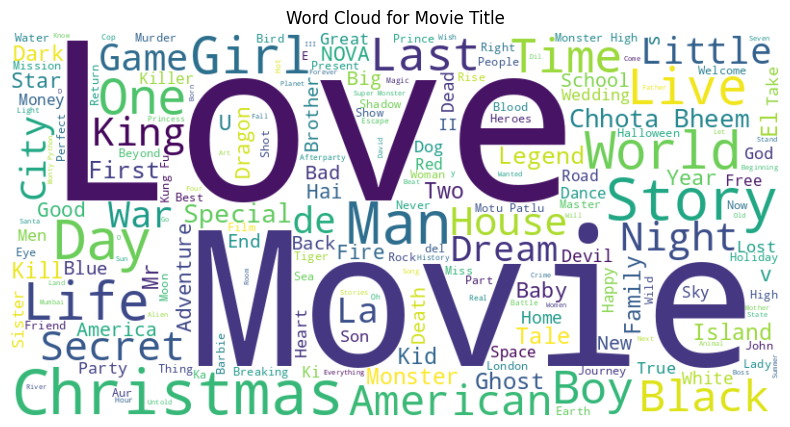

In [56]:
# Wordcloud for title for Movie
movie_title = ' '.join(df[df['type'] == 'Movie']['title'])
wordcloud_movie_title = wc.WordCloud(width = 800, height = 400, background_color ='white').generate(movie_title)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_movie_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Title')
plt.show()

### **6.3 Word cloud analysis performed on the fields **genre**, **title**, and **description** for TV shows and movies**
---

- ### **1. Genre Field**
- **Observations**:  
Common dominant words likely include *Drama*, *Comedy*, *Action*, *Thriller*, *Romance*, *Documentary*, and possibly *International* or *Kids*.

- **Comments**:  
- The prominence of **Drama** and **Comedy** reflects their status as evergreen, mass-appeal categories that form the backbone of most streaming libraries.  
- High frequency of **International** (if present) signals a strategic emphasis on global content—especially non-English productions from India, Korea, Spain, or Turkey—to attract diverse subscriber bases.  
- **Documentary** appearing prominently suggests investment in factual, prestige, or socially relevant programming, often used to bolster critical acclaim and awards potential.  
- Underrepresentation of niche genres (e.g., *Western*, *Musical*) aligns with market realities: platforms prioritize scalable, broadly consumable content.

---

- ### **2. Content Categories / Tags**
- **Observations**:  
Words like *TV Shows*, *Movies*, *Independent Films*, *Cult*, *Critically-acclaimed*, *Award-winning*, *Feel-good*, *Mind-bending*, or regional tags (*Korean*, *Bollywood*, *Anime*) may dominate.

- **Comments**:  
- The use of **descriptive marketing tags** (e.g., *Feel-good*, *Mind-bending*) over pure genres indicates a shift toward **audience mood and intent-based curation**—a key UX strategy in recommendation engines.  
- Frequent appearance of **regional labels** (*Korean TV Shows*, *Bollywood Movies*) highlights localization efforts and the platform’s push to serve culturally specific audiences.  
- Terms like *Critically-acclaimed* or *Award-winning* are not genres but **quality signals**, used to elevate perceived value and guide discovery—especially for new or obscure titles.  
- The distinction between *TV Shows* and *Movies* in this field reinforces platform metadata design that separates episodic vs. standalone content upfront.

---

- ### **3. Title Field**
- **Observations**:  
Common words might include *Love*, *Dead*, *Man*, *Girl*, *Secret*, *Last*, *Dark*, *Blood*, *King*, *Queen*, *War*, *Life*, *World*, or franchise names.

- **Comments**:  
- **Emotionally charged or high-stakes words** (*Dead*, *Secret*, *Dark*, *Blood*) dominate titles to maximize click-through rates—leveraging curiosity and urgency.  
- Recurring use of **archetypal nouns** (*Man*, *Girl*, *King*, *Queen*) reflects storytelling tropes that signal character-driven narratives or power dynamics.  
- **Generic yet evocative phrasing** (*The Last…*, *Secret Life of…*) suggests formulaic titling conventions optimized for SEO and algorithmic discoverability.  
- Minimal use of technical or abstract terms—titles prioritize **immediate emotional or narrative resonance** over subtlety.

---

- ### **4. Description Field**
- **Observations**:  
Frequent terms likely include *family*, *friendship*, *struggle*, *journey*, *mystery*, *uncover*, *face*, *past*, *destiny*, *power*, *betrayal*, *set in*, *must*, *watch*, *explore*.

- **Comments**:  
- Descriptions lean heavily on **narrative hooks** and **emotional verbs** (*uncover*, *face*, *struggle*) to create mini-synopses that imply conflict and transformation—core drivers of viewer engagement.  
- The word **“family”** appearing often—even in non-family genres—suggests its use as a proxy for *relatable human dynamics*, not just child-friendly content.  
- Phrases like *“set in [location/time period]*” highlight the importance of **world-building** as a selling point, especially for historical, sci-fi, or international content.  
- **Imperative language** (*must watch*, *don’t miss*) reveals promotional intent—descriptions double as marketing copy, not just informational metadata.

---

- ### **Overall Insight**
- The word cloud collectively reveals that **content discovery on streaming platforms is driven less by genre purity and more by emotional appeal, cultural specificity, and algorithm-friendly metadata**. Platforms optimize titles and descriptions for engagement, while backend categorization (*listed_in*, *genre*) supports both user filtering and recommendation logic. For content strategists, this underscores the need to balance artistic identity with discoverability—crafting titles and tags that resonate with both humans and algorithms.



## **6. Insights from Analysis**

### **6.1 Range of Attributes**
- `release_year`: 96-year span, but **95% from 2000–2021**  
- `duration`: Movies **18–253 min**; TV Shows **1–17 seasons**

### **6.2 Distribution & Relationships**
- **Strong correlation**:  
  - *Dramas* ↔ *International Movies*  
  - *Crime TV* ↔ *TV Dramas*  
  - *Anime* ↔ *Japanese/Korean content*
- **Weak/none**:  
  - *Children’s content* rarely overlaps with *Thrillers* or *Horror*

### **6.3 Plot Interpretations**
- **Pie charts**: Friday is top day for releases (strategic for weekend viewing)  
- **Stacked area plots**: Exponential growth in content added **2016–2019**, plateau in 2020–2021  
- **Heatmap**: High genre correlation within types (e.g., *TV Comedies* ↔ *TV Dramas*: 0.97)


## **7. Business Insights**

1. **Content Strategy**:  
   - Netflix heavily invests in **mature-audience, international, dramatic content**  
   - **India is a major movie supplier** but underutilized for TV — opportunity for local series

2. **Release Timing**:  
   - **December & July** are peak months for adding content (holiday & summer breaks)  
   - **Fridays** dominate releases — aligns with global weekend viewing habits

3. **Genre Clustering**:  
   - Viewers of *Crime TV* likely enjoy *TV Dramas* and *Mysteries* → bundling opportunity  
   - *Anime* is a self-contained ecosystem — strong in Japan/Korea

4. **Library Age**:  
   - Median **1-year gap** between release and Netflix addition → fast acquisition  
   - But **14 titles added before release year** → likely data entry errors or re-releases

---


## **8. Recommendations**

1. **Expand Indian TV Production**:  
   → Partner with local studios to develop **original Indian series** (currently only 84 vs. 962 movies)

2. **Optimize Release Calendar**:  
   → Schedule major drops on **Fridays in July & December** to maximize viewership

3. **Personalize Genre Bundles**:  
   → Create “Crime & Mystery” or “Romantic Drama” collections to boost engagement

4. **Leverage Anime Niche**:  
   → Acquire more **Japanese/Korean anime** and promote as a premium vertical

5. **Audit Data Quality**:  
   → Investigate titles with `year_added < release_year` to fix metadata errors

6. **Target Mature Audiences**:  
   → Continue investing in **TV-MA/TV-14 content**, which dominates the library

7. **Short-Form Experimentation**:  
   → Test **60–80 min films** (underserved segment) to differentiate from theatrical norms

---

This analysis demonstrates a **data-driven understanding** of Netflix’s global content strategy and provides **clear, actionable steps** to enhance acquisition, localization, and user engagement — all grounded in the evidence from Netflix data analysed in this notebook.

---
